### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Import the dataset - 'df_merged2.csv'

In [2]:
df = pd.read_csv(r'C:\Myra\CareerFoundry\Data Immersion\Achievment 6\df_merged2.csv', index_col = False)

### Data cleaning

In [3]:
df.shape

(239677, 26)

In [6]:
df.columns

Index(['incident_id', 'month', 'year', 'state', 'male_count', 'female_count',
       'unknown_gender', 'child_0-11', 'teen_12-17', 'adult_18+',
       'unknown_age_group', 'arrested', 'injured', 'killed', 'unharmed',
       'unknown_status', 'suspect', 'victim', 'unknown_type', 'latitude',
       'longitude', 'incident_url', 'source_url', 'sources',
       'state_house_district', 'state_senate_district'],
      dtype='object')

In [7]:
df_2 = df[['incident_id', 'month', 'year', 'state', 'male_count', 'female_count',
       'unknown_gender', 'child_0-11', 'teen_12-17', 'adult_18+',
       'unknown_age_group', 'arrested', 'injured', 'killed', 'unharmed',
       'unknown_status', 'suspect', 'victim', 'unknown_type']]

In [8]:
df_2.head()

,incident_id,month,year,state,male_count,female_count,unknown_gender,child_0-11,teen_12-17,adult_18+,unknown_age_group,arrested,injured,killed,unharmed,unknown_status,suspect,victim,unknown_type
0,461105,Jan,2013,Pennsylvania,3,1,1,0,0,5,0,1,4,0,0,0,1,4,0
1,460726,Jan,2013,California,1,0,4,0,0,4,1,0,3,1,0,1,1,4,0
2,478855,Jan,2013,Ohio,5,0,0,0,0,5,0,2,3,1,2,0,2,3,0
3,478925,Jan,2013,Colorado,3,1,0,0,0,4,0,0,0,4,0,0,1,3,0
4,478959,Jan,2013,North Carolina,2,2,0,0,1,3,0,0,2,2,0,0,1,3,0


In [10]:
# Checking for null values
df_2.isnull().sum()

incident_id          0
month                0
year                 0
state                0
male_count           0
female_count         0
unknown_gender       0
child_0-11           0
teen_12-17           0
adult_18+            0
unknown_age_group    0
arrested             0
injured              0
killed               0
unharmed             0
unknown_status       0
suspect              0
victim               0
unknown_type         0
dtype: int64

### Hypothesis

#### The number of individuals arrested is positively correlated with the number of individuals killed or injured in gun violence incidents.

In [31]:
# Since we have seperate columns for people killed or injured, we need to make a column with their total before proceeding further


C:\Users\Myra Ahsan\AppData\Local\Temp\ipykernel_18976\2547595095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['killed_and_injured'] = df_2['killed'] + df_2['injured']


In [32]:
df_2.head()

,incident_id,month,year,state,male_count,female_count,unknown_gender,child_0-11,teen_12-17,adult_18+,unknown_age_group,arrested,injured,killed,unharmed,unknown_status,suspect,victim,unknown_type,killed_and_injured
0,461105,Jan,2013,Pennsylvania,3,1,1,0,0,5,0,1,4,0,0,0,1,4,0,4
1,460726,Jan,2013,California,1,0,4,0,0,4,1,0,3,1,0,1,1,4,0,4
2,478855,Jan,2013,Ohio,5,0,0,0,0,5,0,2,3,1,2,0,2,3,0,4
3,478925,Jan,2013,Colorado,3,1,0,0,0,4,0,0,0,4,0,0,1,3,0,4
4,478959,Jan,2013,North Carolina,2,2,0,0,1,3,0,0,2,2,0,0,1,3,0,4


#### Checking for outliers

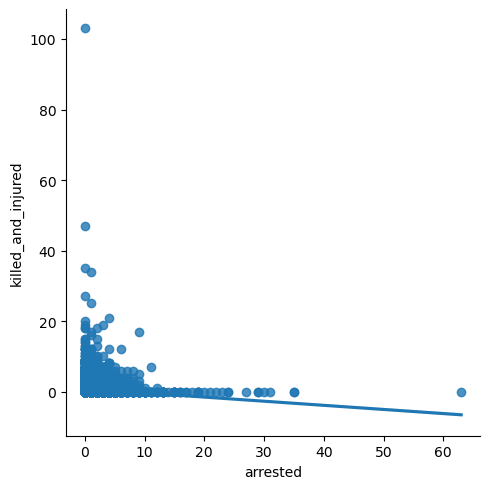

In [33]:
sns.lmplot(x = 'arrested', y = 'killed_and_injured', data = df_2)

The above scatterplot does not show any relation between people arrested and victims killed and/or injured in an incident. If anything it seems there is a slight negative relationship between the two variables. 

In [35]:
df_2['arrested'].max()

63

In [36]:
df_2['killed_and_injured'].max()

103

In [37]:
# Removing the two outliers to see if there is a significant change in the scatterplot
df_3 = df_2[df_2['arrested'] != 63]

In [41]:
df_3 = df_3[df_3['killed_and_injured'] != 103]

In [42]:
df_3['killed_and_injured'].max()

47

In [43]:
df_3['arrested'].max()

35

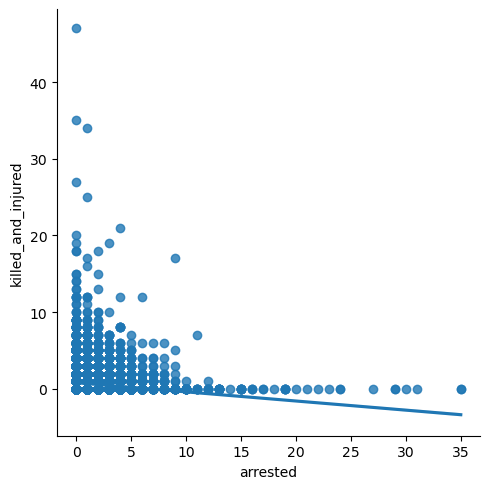

In [44]:
# Checking again after removing the two outliers
sns.lmplot(x = 'arrested', y = 'killed_and_injured', data = df_3)

The hypothesis which was stated in the earlier task proved to be incorrect as it is evident that both do not have a positive correlation. Therefore, we would not be working on this further. 

### Hypothese #2

#### There is a positive correlation between suspects and adults involved aged above 18+ in gun violence incidents. 

### Creating a scatterplot to understand the relationship between suspects and adults_18+

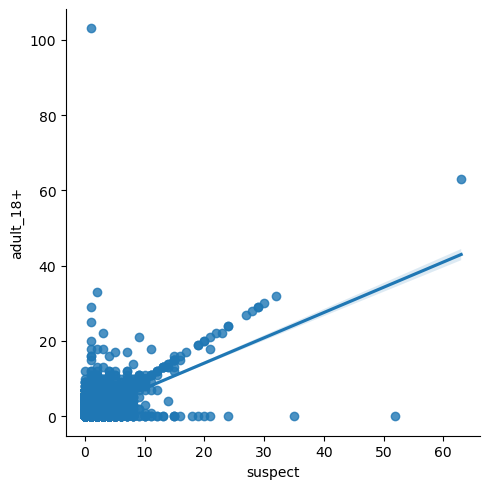

In [53]:
sns.lmplot(x = 'suspect', y = 'adult_18+', data = df_2)

In [56]:
# Reshaping the variables into NumPy arrays and putting them into separate objects

X = df_2['suspect'].values.reshape(-1,1)
y = df_2['adult_18+'].values.reshape(-1,1)

In [57]:
X

array([[1],
       [1],
       [2],
       ...,
       [0],
       [0],
       [1]], dtype=int64)

In [58]:
y

array([[5],
       [4],
       [5],
       ...,
       [1],
       [1],
       [2]], dtype=int64)

In [59]:
# Splitting data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression Analysis

In [60]:
# Creating a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set

In [61]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [62]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

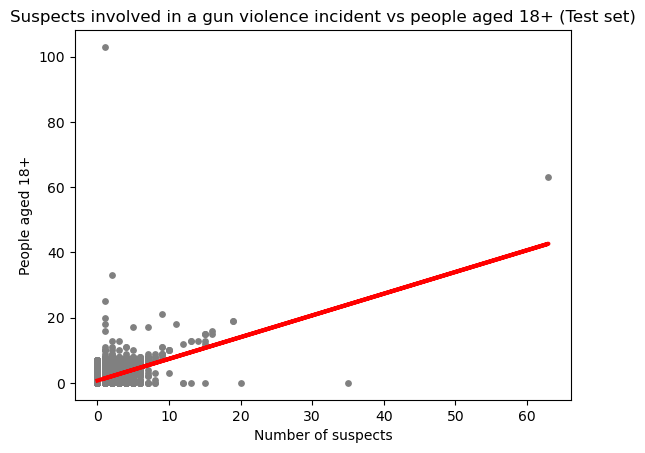

In [63]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Suspects involved in a gun violence incident vs people aged 18+ (Test set)')
plot_test.xlabel('Number of suspects')
plot_test.ylabel('People aged 18+')
plot_test.show()

In [64]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [65]:
# Printing the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.6657168]]
Mean squared error:  1.0146548461492428
R2 score:  0.3042302185068684


- Slope is positive which proves that both variables have a positive relationship. 
- The MSE is small which means that the regression line passes fairly close to the observations, making it a good fit. 
- The R2 score,however, is approximately 0.3042, or 30.42% out of 100, which is not that great. It means that our model is not that great of a fit.

In [66]:
# Creating a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,0.722855
1,3,1.388572
2,1,0.722855
3,1,0.722855
4,2,2.054288
5,1,1.388572
6,0,2.720005
7,2,1.388572
8,1,1.388572
9,2,1.388572


There’s quite the difference between the actual and predicted y values. This just adds evidence to the fact that our model is not doing a great job of explaining the relationship between the suspects involved in a gun violence incident and people involved aged 18 and above. The relationship simply does not follow a single, straight regression line.

### Comparing how the regression fits the training set

In [67]:
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [68]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [69]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.6657168]]
Mean squared error:  0.8367627028540043
R2 score:  0.3339879862064139


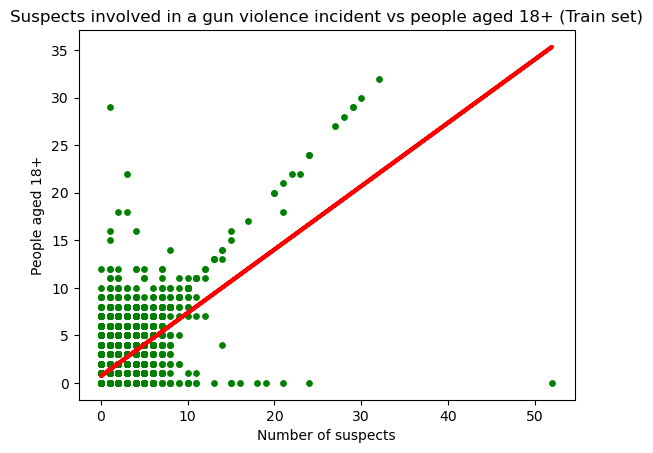

In [70]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Suspects involved in a gun violence incident vs people aged 18+ (Train set)')
plot_test.xlabel('Number of suspects')
plot_test.ylabel('People aged 18+')
plot_test.show()

We have a higher R2 score on the train set but the difference in not too much, so we know we have not overfitted the model. However, it also confirms that the relationship we are exploring is not purely linear.

#### Possible bias 

- Reporting bias may occur if certain incidents or types of suspects are underreported or overrepresented in the dataset. This can introduce distortions and affect the results of the regression analysis.
- The relationship between suspects and individuals aged 18 and above may not adhere to a simple linear pattern due to the interplay of various contextual factors, including systemic biases, socioeconomic disparities, and community dynamics. These factors might not be adequately captured by the available variables, leading to a poor fit of the regression model.
